In [1]:
import os
import numpy as np
import librosa
import librosa.display
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd

In [32]:
path = 'audio_inputs'
# file = 'piano-a_A_major.wav'
file = 'single-piano-note-a2_100bpm_C_major.wav'

# sr, audio_data = wavfile.read(os.path.join(path, file))
# audio_data, sr = librosa.load(os.path.join(path, file), mono=True, sr=None)
audio_data, sr = librosa.load(os.path.join(path, file), mono=True)
print(f'Sampling rate: {sr} samples/sec')
print(f'Audio data type: {audio_data.dtype}')
print(f'Audio data shape: {audio_data.shape}')

Sampling rate: 22050 samples/sec
Audio data type: float32
Audio data shape: (340096,)


1 harmonic occurs at the frequency: 660.9891030767783 Hz
2 harmonic occurs at the frequency: 1325.8034496142266 Hz
3 harmonic occurs at the frequency: 1549.1587669363944 Hz
4 harmonic occurs at the frequency: 2226.4213633797517 Hz


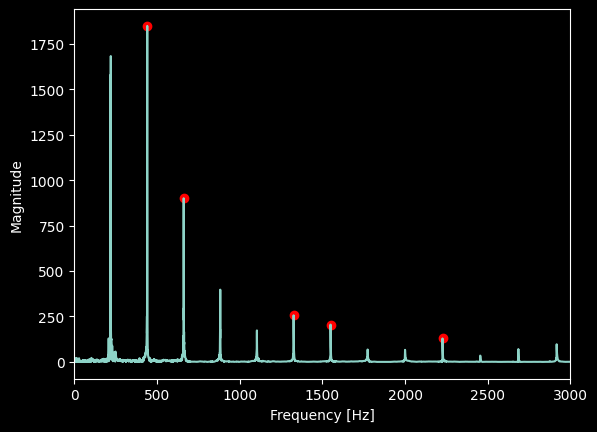

In [33]:
N = len(audio_data)
T = 1.0 / sr
t = np.linspace(0.0, N*T, N, endpoint=False)
freqs = scipy.fft.rfftfreq(N, d=T)


s = audio_data
S = scipy.fft.rfft(s)
magnitude = np.abs(S)
f0_idx = np.argmax(magnitude)
# magnitude[f0_index] *= 2
# f0_magnitude = np.abs(S[f0_index]) * 2/N
f0 = freqs[f0_idx]
# print(f'Fundamental frequency: {f0} Hz at index {f0_idx}')
# print(f'Magnitude at index {f0_idx}: {magnitude[f0_idx]}')

# first 3 harmonics
circled_indices = []
half = f0_idx + f0_idx//2
for k in range(4):
    freq_low = freqs[half + k*f0_idx]
    freq_high = freqs[half + (k+1)*f0_idx]
    ind = np.where((freqs >= freq_low) & (freqs <= freq_high))[0]
    ind_min = ind[0]
    ind_max = ind[::-1][0]
    harmonic_idx = np.argmax(np.abs(S[ind_min:ind_max])) + ind_min
    harm_freq = freqs[harmonic_idx]
    print(f'{k+1} harmonic occurs at the frequency: {harm_freq} Hz')
    circled_indices.append(harmonic_idx)

plt.plot(freqs, magnitude)
plt.xlabel('Frequency [Hz]')
plt.xlim([0, 3000])
plt.ylabel('Magnitude')
plt.scatter(freqs[f0_idx], magnitude[f0_idx], color='red')
plt.scatter(freqs[circled_indices], magnitude[circled_indices], color='red')
plt.show()


In [26]:
freqs[f0_idx]
k = 1
half = f0_idx + f0_idx//2

# 2nd harmonic
for k in range(5):
    print(f'Range for the {k+1} harmonic: {freqs[half + k*f0_idx]} - {freqs[half + (k+1)*f0_idx]} Hz')
    # freq_low = freqs[half + k*idx]
    # freq_high = freqs[half + (k+1)*idx]


Range for the 1 harmonic: 664.7197362223269 - 1108.0826071596798 Hz
Range for the 2 harmonic: 1108.0826071596798 - 1551.4454780970325 Hz
Range for the 3 harmonic: 1551.4454780970325 - 1994.8083490343854 Hz
Range for the 4 harmonic: 1994.8083490343854 - 2438.171219971738 Hz
Range for the 5 harmonic: 2438.171219971738 - 2881.534090909091 Hz


In [16]:
# first 3 harmonics
circled_indices = []
for k in range(4):
    freq_low = freqs[half + k*idx]
    freq_high = freqs[half + (k+1)*idx]
    ind = np.where((freqs >= freq_low) & (freqs <= freq_high))[0]
    ind_min = ind[0]
    ind_max = ind[::-1][0]
    # print(f'Min idx: {ind_min}, Max idx: {ind_max}')
    harmonic_idx = np.argmax(np.abs(S[ind_min:ind_max])) + ind_min
    print(harmonic_idx)
    harm_freq = freqs[harmonic_idx]
    print(f'{k+1} harmonic occurs at the frequency: {harm_freq} Hz')
    circled_indices.append(harmonic_idx)



1369
1 harmonic occurs at the frequency: 888.6731629769195 Hz
2065
2 harmonic occurs at the frequency: 1340.4748586905323 Hz
2779
3 harmonic occurs at the frequency: 1803.9610810174281 Hz
3428
4 harmonic occurs at the frequency: 2225.253179463024 Hz


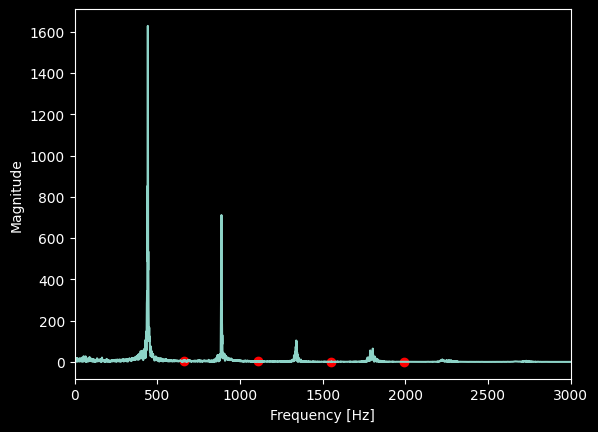

In [86]:
# circle the points where the harmonics occur
for i in range(4):
    plt.plot(freqs[half + i*idx], magnitude[half + i*idx], 'ro')
plt.plot(freqs[:N//2], magnitude)
plt.xlabel('Frequency [Hz]')
plt.xlim([0, 3000])
plt.ylabel('Magnitude')
plt.show()
